In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose=False, 
           classifier='kunetplus2d',
           discriminator='cnn',
           filter_num= [16, 32, 64, 128, 256, 512],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=False, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=None, 
           metric=None           
          )

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmphckeqv6wGP2


In [4]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/EBHI-SEG/EBHI_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/EBHI-SEG/EBHI_masks.npy')

In [5]:
images.shape

(2180, 512, 512, 1)

In [6]:
masks.shape

(2180, 512, 512, 1)

In [7]:
R.run(images=images, masks=masks, runs=8, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
Epoch 1/100
2/2 [==============================] - 17s 7s/step - loss: 0.7228 - dice_coeff: 0.6362 - val_loss: 0.6927 - val_dice_coeff: 0.5797
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 0.6760 - dice_coeff: 0.6620 - val_loss: 0.6921 - val_dice_coeff: 0.5802
Epoch 3/100
2/2 [==============================] - 3s 2s/step - loss: 0.6676 - dice_coeff: 0.6659 - val_loss: 0.6915 - val_dice_coeff: 0.5808
Epoch 4/100
2/2 [==============================] - 3s 2s/step - loss: 0.6595 - dice_coeff: 0.6673 - val_loss: 0.6909 - val_dice_coeff: 0.5814
Epoch 5/100
2/2 [==============================] - 3s 2s/step - loss: 0.6443 - dice_coeff: 0.6616 - val_loss: 0.6903 - val_dice_coeff: 0.5820
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 0.6353 - dice_coeff: 0.6535 - val_loss: 0.6898 - val_dice_coeff: 0.5825
Epoch 7/100
2/2 [==============================] - 3s 2s/step - loss: 0.6311 - dice_coeff: 0.6488 - 

2/2 [==============================] - 2s 2s/step - loss: 0.2281 - dice_coeff: 0.8611 - val_loss: 0.8207 - val_dice_coeff: 0.4827
Epoch 59/100
2/2 [==============================] - 3s 2s/step - loss: 0.2279 - dice_coeff: 0.8627 - val_loss: 0.8275 - val_dice_coeff: 0.4784
Model saved to: /tmp/tmphckeqv6wGP2/kunetplus2d_0kunetplus2d_model
History saved to: /tmp/tmphckeqv6wGP2/kunetplus2d_history_0.pkl
Testing the classifier...
****** TRAINING DISCRIMINATOR ******
Model saved to /tmp/tmphckeqv6wGP2/cnnd_0.model
History saved to /tmp/tmphckeqv6wGP2/cnnd_history_0.pickle
Testing the discriminator...
5/5 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Replacing 18 from 55 !
D_relabeled_ 18
point ids 18
Removed: 18 Filled: 18
TOOK 443.77146673202515 seconds
==== DONE LOOP 1 ====
******
Loop 2
Epoch 1/100
2/2 [==============================] - 7s 6s/step - loss: 0.2541 - dice_coeff: 0.8548 - val_loss: 0.8344 - val_dice_coeff: 0.4740
Epoch 2/100
2/2 [=====

Epoch 9/100
3/3 [==============================] - 4s 1s/step - loss: 0.1513 - dice_coeff: 0.9095 - val_loss: 1.5806 - val_dice_coeff: 0.1787
Epoch 10/100
3/3 [==============================] - 4s 1s/step - loss: 0.1575 - dice_coeff: 0.9073 - val_loss: 1.5923 - val_dice_coeff: 0.1759
Model saved to: /tmp/tmphckeqv6wGP2/kunetplus2d_4kunetplus2d_model
History saved to: /tmp/tmphckeqv6wGP2/kunetplus2d_history_4.pkl
Testing the classifier...
Testing the discriminator...
5/5 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Replacing 21 from 65 !
D_relabeled_ 21
point ids 21
Removed: 21 Filled: 21
TOOK 95.62326216697693 seconds
==== DONE LOOP 5 ====
******
Loop 6
Epoch 1/100
4/4 [==============================] - 7s 2s/step - loss: 0.1782 - dice_coeff: 0.9012 - val_loss: 1.6133 - val_dice_coeff: 0.1710
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.1606 - dice_coeff: 0.9074 - val_loss: 1.6321 - val_dice_coeff: 0.1667
Epoch 3/100
4

In [8]:
R.classifier_scores

[[0.8279009461402893, 0.4752448499202728],
 [1.0056437253952026, 0.37770652770996094],
 [1.0821820497512817, 0.34384599328041077],
 [1.4399505853652954, 0.21684576570987701],
 [1.600203514099121, 0.1757134199142456],
 [1.6733490228652954, 0.15810085833072662],
 [1.5099085569381714, 0.25904908776283264],
 [0.8648500442504883, 0.621349036693573]]

In [9]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [112.09808349609375, 0.5538461804389954],
 [506.7834167480469, 0.4615384638309479]]

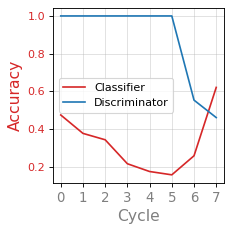

In [10]:
R.plot()